In [1]:
%pylab inline
from scipy import linalg
from mpl_toolkits.mplot3d import Axes3D
from pygadgetreader import *

Populating the interactive namespace from numpy and matplotlib


# Shape tensor definition: 

\begin{equation}
S_{i,j} = \dfrac{\sum_{k} m_k (r_{k})_i (r_{k})_j} {\sum_{k} m_k w(r)_k}
\end{equation}
Where $w(r)$ is the weight function defined as:

\begin{equation}
w(r) = \dfrac{1}{r_{ell}^2}
\end{equation}

Where the elliptical radius $r_{ell}$ is defined as:

\begin{equation}
r_{ell} = \sqrt{x_{ell}^2 + \dfrac{y_{ell}^2}{(b/a)^2} + \dfrac{z_{ell}^2}{(c/a)^2}}
\end{equation}

Where the $c \leq b \leq a$

For our purporses all of the particles have the same mass then the shape tensor can be expressed as:

\begin{equation}
S_{i,j} = \dfrac{\sum_{k}  (r_{k})_i (r_{k})_j} {\sum_{k}  w(r_{ell})_k}
\end{equation}



## Iterative process

1. Define a spherical shell of radius 1 kpc at a given radius from the center.
2. Compute $S_{i,j}$ for the particles inside the spherical shell
3. Compute the axis length and orientation
4. Make an ellipsoidal shell deformed with the previous axis length
5. 

In [178]:
def shells(x, y, z, width, r, q, s):
    r_shell = np.sqrt(x**2.0 +y**2.0/q**2.0 +  z**2.0/s**2.0)
    index_shell = np.where((r_shell<r))[0]# & (r_shell>(r-width)))[0]
    x_shell = x[index_shell]
    y_shell = y[index_shell]
    z_shell = z[index_shell]
    return x_shell, y_shell, z_shell

In [123]:
#Function that computes the Shape tensor
def shape_tensor(x, y, z):
    N = len(x)
    XYZ = np.array([x, y, z])
    shape_T = np.zeros([3, 3])
    for i in range(3):
        for j in range(3):
            XX = np.zeros(N)
            for n in range(N):
                XX[n] = XYZ[i,n] * XYZ[j,n]
            shape_T[i][j] = sum(XX) / N
    return shape_T        

# Computing the axis ratios using the Shape Tensor
def axis_ratios(shape_T):
    eival, evec = eig(shape_T)
    oeival = sort(eival)
    #print oeival
    a = oeival[2]
    b = oeival[1]
    c = oeival[0]
    s = np.sqrt(c/a)
    q = np.sqrt(b/a)
    return evec, s, q

#
def rotation(X, Y, Z, rot_matrix):
    coordiantes = np.array([X, Y, Z])
    rot_coordinates = dot(rot_matrix, coordiantes)
    return rot_coordinates[0], rot_coordinates[1], rot_coordinates[2]
 
# Selecting shells that 
def reshape(x, y, z, r, dr, tol):
    s_i = 1.0
    q_i = 1.0
    x_shell, y_shell, z_shell = shells(x, y, z, dr, r, q_i, s_i)
    s_tensor = shape_tensor(x_shell, y_shell, z_shell)
    rot_i, s, q = axis_ratios(s_tensor)
    t = 0
    #scatter(x_shell, y_shell, alpha=0.4, c='r')
    while ((abs(s-s_i)>tol) & (abs(q-q_i)>tol)):
        t +=1
        s_i, q_i = s, q
        x_shell, y_shell, z_shell = shells(x, y, z, dr, r, q_i, s_i)
        s_tensor = shape_tensor(x_shell, y_shell, z_shell)
        rot, s, q = axis_ratios(s_tensor)
    #scatter(x_shell, y_shell, s=15, alpha=0.3)
    #axis('equal')
    #print s, q
    return s, q

In [124]:
data_i = np.loadtxt('halot0.dat')
data_f = np.loadtxt('halotf.dat')

(-100000.0, 100000.0, -100000.0, 100000.0)

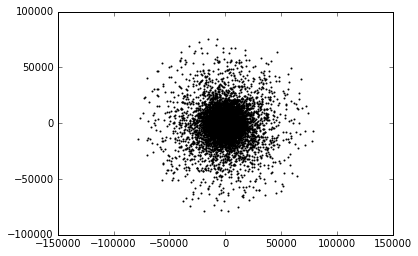

In [125]:
scatter(data[:,0], data[:,1], s=1)
axis('equal')

In [187]:
r = np.linspace(3, 500, 100)
qv_i = np.zeros(len(r))
sv_i = np.zeros(len(r))
qv_f = np.zeros(len(r))
sv_f = np.zeros(len(r))
for i in range(len(r)):
    sv_i[i], qv_i[i] = reshape(data_i[:,0], data_i[:,1], data_i[:,2], r[i], 1.2, 1E-2)
    sv_f[i], qv_f[i] = reshape(data_f[:,0]-3,data_f[:,1]-33, data_f[:,2]+10, r[i], 1.2, 1E-1)
    print i

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


(0, 1.1)

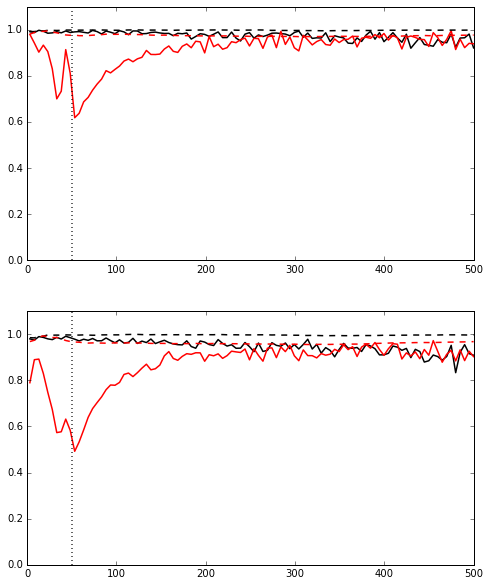

In [188]:
figure(figsize=(8, 10))
subplot(2, 1, 1)
plot(r, q_i, c='k', lw=1.5)
plot(r, q_f, c='r', ls='-', lw=1.5)
plot(r, qv_i, c='k', lw=1.5, ls='--')
plot(r, qv_f, c='r', lw=1.5, ls='--')
axvline(50, c='k', alpha=0.8, ls=':', lw=1.5)
#axhline(1, c='k', alpha=0.8, ls='--', lw=1.5)
ylim(0, 1.1)
subplot(2, 1, 2)
plot(r, s_i, c='k', lw=1.5)
plot(r, s_f, c='r', ls='-', lw=1.5)
plot(r, sv_i, c='k', lw=1.5, ls='--')
plot(r, sv_f, c='r', ls='--', lw=1.5)
#axhline(1, c='k', alpha=0.8, ls='--', lw=1.5)
axvline(50, c='k', alpha=0.8, ls=':', lw=1.5)
ylim(0, 1.1)